# Evolutionary "hello world"
### This is a toy project that I developed during Summer 2016 to familiarize myself with genetic algorithm. The goal of this project is to evolve the string "hello world" from a bunch of random strings. 

### Through experiments below, I found the following settings positively relate with quicker algorithm convergence
#### - less complex evolutionary goal
#### - less complex genotype value range
#### - higher diversity in initial population
#### - larger population size
#### - appropriate mutation rate (in this case, 2%)
#### - random choice of crossover point rather than fixed
#### - higher selection weight factor (the higher the fitness, the more likely to be selected to breed next generation)

In [344]:
import time
import math
import random as rdm
import string
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [223]:
def mutation(word,mutation_rate):
    temp_word_list=list(word)
    temp_word_list = map(lambda x:rdm.choice(string.lowercase+' ') if rdm.random() < mutation_rate else x,temp_word_list)
    mutated_word = ''.join(temp_word_list)    
    return mutated_word

### Feed a list of candidates and a list of fittness scores for current generation, output population for next generation

In [598]:
def breed(target,population_size,population_list,fitness_list,mutation_rate,crossover_point,selection_weight_factor):
    
    total_fitness = float(sum(fitness_list)) # sum of the fittness scores for all candidates
    
    if total_fitness <= 1: # re-create a population list if the current one has no useful or less than 2 candidates
        population_list = []
        for i in range(population_size):
            word = ''.join([rdm.choice(string.lowercase+' ') for i in range(len(target))])
            population_list.append(word) 
        
        return population_list
    
    # weight to be selected as parents, proportional to its fittness 
    selection_weights = np.array(map(lambda x:x/total_fitness,fitness_list)) 
    selection_weights = selection_weights**selection_weight_factor
    selection_weights = selection_weights*(1/selection_weights.sum()) # make sure the weights sum up to one
    
    # select pairs of parents with a probability that is proportional to their fittness
    new_population = []
    for i in range(population_size/2):
        # candidates with 0 fitness will not be selected and candidate with a fitness of 2 is twice as likely to be selected as the candidates with a fitness of 1
        # parents have to be two different species for diversity purpose
        # here we let them to have monogamy, that is, 1 for husband and 1 for wife
        try:
            parents = np.random.choice(population_list, 2, p=selection_weights, replace=False)
        except:
            parents = np.random.choice(population_list, 2, replace=False) 

        # once we have parents, we let them breed the next generation of the strings 
        if crossover_point == 'fixed':
            crossoverPoint = len(target)/2 # fixed crossover point, set at the middle
        else:
            crossoverPoint = rdm.randint(1,len(target)-2) # dynamic crossover point, also ensures each parent will have something to pass down to the next generation

        new_word1 = parents[0][:crossoverPoint] + parents[1][crossoverPoint:]
        new_population.append(mutation(new_word1,mutation_rate))
        new_word2 = parents[1][:crossoverPoint] + parents[0][crossoverPoint:]
        new_population.append(mutation(new_word2,mutation_rate))

    return new_population

### Initial Configuration

In [600]:
target = 'hello world'
max_generation = 200
population = 40
mutation_rate = 0.02 # for each string, there's a chance for each letter to mutate 
crossover_point = 'dynamic' # or 'fixed'
selection_weight_factor = 2 # the weight factor on candidates based on fittness, the higher the more likely to choose fitted ones as parents when set above 3, local_best and global_best will be about the same

### Main body of the algorithm, single run

In [601]:
# initiate metrics
local_best_candidate = [] 
local_best_score = [] 
global_best_candidate = []
global_best_score = []
local_avg_fittness = []
global_avg_fittness = []

# at generation1, start with a random population
population_list = []
fittness_list = []
for i in range(population):
    # generate random strings that's of the length of the target
    # here we add blank as one of the candidates since there's a blank in target string
    word = ''.join([rdm.choice(string.lowercase+' ') for i in range(len(target))])
    population_list.append(word)    
        
# evaluate the candidates and calculate their fittness scores
for word in population_list:
    fittness = sum(map(lambda x,y: 1 if x==y else 0, word,target))
    fittness_list.append(fittness)

print 'generation1:'
print 'population_list:',population_list 
print 'fittness_list:',fittness_list
print 'best candidate:',population_list[fittness_list.index(max(fittness_list))]
    
# generate metrics about the generation
best_candidate_this_gen = [] 
local_best_score.append(max(fittness_list)) 
best_candidate_all_gen = []
global_best_score.append(max(fittness_list))
local_avg_fittness.append(float(sum(fittness_list))/len(fittness_list))
global_avg_fittness.append(float(sum(fittness_list))/len(fittness_list))    
    

# loop through each generation until it reaches the limit
g = 2
while g <= max_generation:
    
    # breed next generation
    population_list = breed(target,population,population_list,fittness_list,mutation_rate,crossover_point,selection_weight_factor)
    
    # evaluate the candidates and calculate their fittness scores
    fittness_list = []
    for word in population_list:
        fittness = sum(map(lambda x,y: 1 if x==y else 0, word,target))
        fittness_list.append(fittness)

    # generate metrics about the generation
    local_best_score.append(max(fittness_list))
    global_best_score.append(reduce(lambda x,y: x if x>y else y, local_best_score,max(fittness_list)))
    local_avg_fittness.append(float(sum(fittness_list))/len(fittness_list))
    global_avg_fittness.append(float(sum(local_avg_fittness))/len(local_avg_fittness))
    
    # print results for every 10 generations
    if g%10 == 0: 
        print '\n generation',g
        print 'population_list:',population_list 
        print 'fittness_list:',fittness_list
        print 'local best candidate:',population_list[fittness_list.index(max(fittness_list))]
    
    # if perfect candidate is found, stop the process
    if max(fittness_list) == len(target):
        if g%10 != 0:
            print '\n generation',g
            print 'population_list:',population_list 
            print 'fittness_list:',fittness_list
            print 'local best candidate:',population_list[fittness_list.index(max(fittness_list))]
        break
    
    g += 1

generation1:
population_list: ['vifrflhmuyh', 'qbhhlvnxdex', 'tkigygdkpdh', 'xcb l czyaq', 'k aatsqwtik', 'vyqucaycmxw', 'cmlsakqklqs', 'gpkcolwupos', 'wnlufzjsecl', 'uzkx ftoiwv', 'rtfbbxlkdqu', 'ouhfoxlpwh ', 'tgt  bmhqeq', 'vgurovcwpsl', 'gwjrzxitvru', 'etlnunfhzpx', 'puoljkingeg', 'oqanwrkfxwt', 'vlmrcuexibz', 'crzgbiszpau', 'atptvwgegao', 'qsexjizgv t', 'amxetyoy hm', 'f hp sbgqoe', 'acrblwu dxs', 'xxfvsblxoop', 'pqbtwcrskwh', 'acpdeqlnmqd', 'woblrkakukk', 'swzpkrxaxsf', 'zuiwfpaqtmm', 'qhvagrottel', 'ntunortqmlf', ' kwkmhnsn a', 'tonzbytluyf', 'cwotuospsv ', 'uknvjxmwkfl', 'xcdiaqrgxkc', 'bupg m elyi', 'bilhlhlrswu']
fittness_list: [0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1]
best candidate: gpkcolwupos

 generation 10
population_list: ['uzllolwqplf', 'wjololwypqs', 'woblolwudlf', 'wnllolwuplf', 'wnlcorwumlf', 'uzlce wuplp', 'etllolwumqv', 'wn lolwuplp', 'wnlho wujqd', 'etlcolwuplf', 'uzllolwumqd', 'wollo

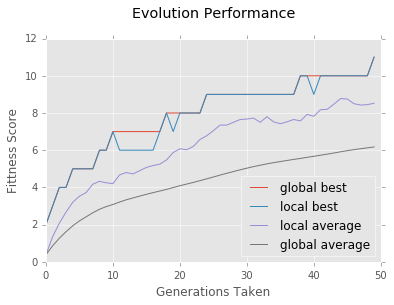

In [602]:
plt.ylim(0, len(target)+1)
plt.plot(range(len(global_best_score)), global_best_score, label='global best')
plt.plot(range(len(global_best_score)), local_best_score, label='local best')
plt.plot(range(len(global_best_score)), local_avg_fittness, label='local average')
plt.plot(range(len(global_best_score)), global_avg_fittness, label='global average')
plt.legend(loc='best')
plt.xlabel("Generations Taken")
plt.ylabel("Fittness Score")
plt.title('Evolution Performance\n')

#  

### Trial version of the Evolutionary Algorithm, acts as a function, fed with parameters

In [603]:
def evolution_trial(target,population_size, max_gen, mutation_rate,crossover_point,selection_weight_factor):
    
    # at generation1, start with a random population
    population_list = []
    fittness_list = []
    for i in range(population_size):
        # generate random strings that's of the length of the target
        # here we add blank as one of the candidates since there's a blank in target string
        word = ''.join([rdm.choice(string.lowercase+' ') for i in range(len(target))])
        population_list.append(word)    

    # evaluate the candidates and calculate their fittness scores
    for word in population_list:
        fittness = sum(map(lambda x,y: 1 if x==y else 0, word,target))
        fittness_list.append(fittness)
    
    # loop through each generation until it reaches the limit
    g = 2
    while g <= max_gen:
        
        # breed next generation
        population_list = breed(target,population_size,population_list,fittness_list,mutation_rate,crossover_point,selection_weight_factor)

        # evaluate the candidates and calculate their fittness scores
        fittness_list = []
        for word in population_list:
            fittness = sum(map(lambda x,y: 1 if x==y else 0, word,target))
            fittness_list.append(fittness)

        # if perfect candidate is found, stop the process
        if max(fittness_list) == len(target):
            return g
        
        g += 1
    
    return g-1 # return number of generations taken to reach 'hello world'

# Analyzing algorithm performance with several settings

### Plot learning curve (num of genrations took to reach global best VS. population size) with 95% confidence interval, used to find optimal population size
#### Except population size, other settings are controlled: max_generation = 5000, mutation_rate = 0.05, crossover = dynamic crossover point with parents selected based on weighted probability

population size:  10 ,95% CI for Num of Gens Needed: ( 5000.0 , 5000.0 )
population size:  20 ,95% CI for Num of Gens Needed: ( 5000.0 , 5000.0 )
population size:  30 ,95% CI for Num of Gens Needed: ( -1009.34797184 , 6289.14797184 )
population size:  40 ,95% CI for Num of Gens Needed: ( -664.668335376 , 1945.46833538 )
population size:  50 ,95% CI for Num of Gens Needed: ( -133.890435388 , 720.290435388 )
population size:  60 ,95% CI for Num of Gens Needed: ( -233.136977789 , 683.936977789 )
population size:  70 ,95% CI for Num of Gens Needed: ( -39.152401272 , 317.952401272 )
population size:  80 ,95% CI for Num of Gens Needed: ( 8.32011271143 , 136.079887289 )
population size:  90 ,95% CI for Num of Gens Needed: ( -46.7245091008 , 249.924509101 )
population size:  100 ,95% CI for Num of Gens Needed: ( 10.8169258316 , 114.783074168 )
time spent:  137.634897947


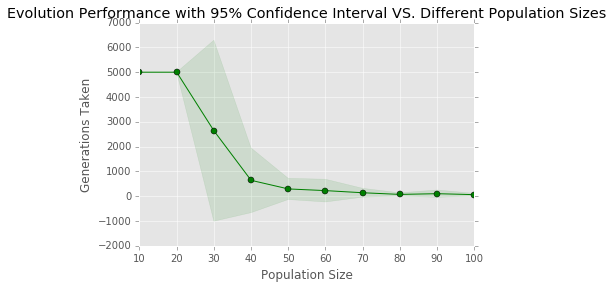

In [374]:
start = time.time()
# this will be a nested list, each sub-list correspondes to a fixed population size,
# consisting of multiple trials, each is the number of generations taken to reach "hello world"
generations_taken = []  
population_pool = [10,20,30,40,50,60,70,80,90,100]
max_gen = 5000
mutation_rate = 0.05
crossover_point = 'dynamic'
selection_weight_factor = 1
repeating_factor =10 # repeat this many times for each population size, to get the average and standard deviation

for pop_size in population_pool:
    #print 'pop_size: ',pop_size
    current_gen_taken = [] 
    for i in range(repeating_factor):
        current_gen_taken.append(evolution_trial(pop_size,max_gen,mutation_rate,crossover_point,selection_weight_factor))
    generations_taken.append(current_gen_taken)

mean_generations_taken = np.array(generations_taken).mean(axis=1)
std_generations_taken = np.array(generations_taken).std(axis=1)

plt.title('Evolution Performance with 95% Confidence Interval VS. Different Population Sizes\n')
plt.xlabel("Population Size")
plt.ylabel("Generations Taken")
plt.fill_between(population_pool, mean_generations_taken - 2*std_generations_taken,
                 mean_generations_taken + 2*std_generations_taken, alpha=0.1,color="g")
plt.plot(population_pool, mean_generations_taken, 'o-', color="g")

for i in range(len(population_pool)):
    print 'population size: ',population_pool[i],', 95% CI for Num of Gens Needed: (',mean_generations_taken[i]-2*std_generations_taken[i],',',mean_generations_taken[i]+2*std_generations_taken[i],')'

print 'time spent: ',time.time()-start

#### We can see when population size is larger than 40, the larger the population size is, the quicker it'll find a good solution. 
#### Note that the confidence interval here and behow contains negative ranges, of coruse this is not possible so the lower limit should be 1 instead

#  

### Plot learning curve (num of genrations took to reach global best VS. mutation rate) with 95% confidence interval, used to find optimal mutation rate
#### Except mutation rate, other settings are controlled: population_size = 50, max_generation = 5000, crossover = random crossover point with parents selected based on weighted probability

mutation rate:  0.0 ,95% CI for Num of Gens Needed: ( 5000.0 , 5000.0 )
mutation rate:  0.0111111111111 ,95% CI for Num of Gens Needed: ( 86.4934234361 , 656.706576564 )
mutation rate:  0.0222222222222 ,95% CI for Num of Gens Needed: ( 9.53085331425 , 432.469146686 )
mutation rate:  0.0333333333333 ,95% CI for Num of Gens Needed: ( -37.2176191839 , 480.417619184 )
mutation rate:  0.0444444444444 ,95% CI for Num of Gens Needed: ( -167.416732279 , 742.816732279 )
mutation rate:  0.0555555555556 ,95% CI for Num of Gens Needed: ( -646.652580348 , 1708.65258035 )
mutation rate:  0.0666666666667 ,95% CI for Num of Gens Needed: ( -138.414956662 , 1366.61495666 )
mutation rate:  0.0777777777778 ,95% CI for Num of Gens Needed: ( -501.661772278 , 5364.46177228 )
mutation rate:  0.0888888888889 ,95% CI for Num of Gens Needed: ( -711.879703461 , 6114.87970346 )
mutation rate:  0.1 ,95% CI for Num of Gens Needed: ( 2688.54039915 , 6585.85960085 )
time spent:  368.01363492


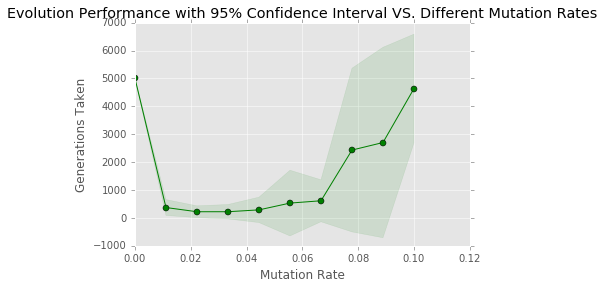

In [373]:
start = time.time()
# this will be a nested list, each sub-list correspondes to a fixed population size,
# consisting of multiple trials, each is the number of generations taken to reach "hello world"
generations_taken = []  
population_size = 50
max_gen = 5000
mutation_rates = np.linspace(0, 0.1, 10)
crossover_point = 'dynamic'
selection_weight_factor = 1
repeating_factor =10 # repeat this many times for each population size, to get the average and standard deviation

for m_rate in mutation_rates:
    #print 'm_rate: ',m_rate
    current_gen_taken = [] 
    for i in range(repeating_factor):
        current_gen_taken.append(evolution_trial(population_size,max_gen,m_rate,crossover_point,selection_weight_factor))
    generations_taken.append(current_gen_taken)

mean_generations_taken = np.array(generations_taken).mean(axis=1)
std_generations_taken = np.array(generations_taken).std(axis=1)

plt.title('Evolution Performance with 95% Confidence Interval VS. Different Mutation Rates\n')
plt.xlabel("Mutation Rate")
plt.ylabel("Generations Taken")
plt.fill_between(mutation_rates, mean_generations_taken - 2*std_generations_taken,
                 mean_generations_taken + 2*std_generations_taken, alpha=0.1,color="g")
plt.plot(mutation_rates, mean_generations_taken, 'o-', color="g")

for i in range(len(mutation_rates)):
    print 'mutation rate: ',mutation_rates[i],', 95% CI for Num of Gens Needed: (',mean_generations_taken[i]-2*std_generations_taken[i],',',mean_generations_taken[i]+2*std_generations_taken[i],')'

print 'time spent: ',time.time()-start

#### Looks like the algorithm will quickly find a good solution when mutation rate is set around 2%

#  

### Plot learning curve (num of genrations took to reach global best VS. fixed crossover/dynamic crossover) with 95% confidence interval, used to find best crossover point choosing mechnism. 
#### Here I used the middle point of the string as the fixed crossover point.

Crossover Point:  fixed , 95% CI for Num of Gens Needed: ( -147.388338654 , 1894.38833865 )
Crossover Point:  dynamic , 95% CI for Num of Gens Needed: ( 88.7656768347 , 545.634323165 )
time spent:  26.8077499866


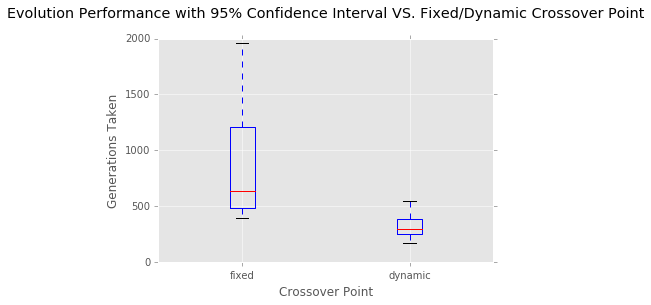

In [488]:
start = time.time()
# this will be a nested list, each sub-list correspondes to a fixed population size,
# consisting of multiple trials, each is the number of generations taken to reach "hello world"
generations_taken = []  
population_size = 50
max_gen = 5000
mutation_rate = 0.02
crossover_points = ['fixed','dynamic']
selection_weight_factor = 1
repeating_factor =10 # repeat this many times for each population size, to get the average and standard deviation

for crossover_point in crossover_points:
    #print 'crossover_point: ',crossover_point
    current_gen_taken = [] 
    for i in range(repeating_factor):
        current_gen_taken.append(evolution_trial(population_size,max_gen,mutation_rate,crossover_point,selection_weight_factor))
    generations_taken.append(current_gen_taken)

mean_generations_taken = np.array(generations_taken).mean(axis=1)
std_generations_taken = np.array(generations_taken).std(axis=1)

plt.title('Evolution Performance with 95% Confidence Interval VS. Fixed/Dynamic Crossover Point\n')
plt.xlabel("Crossover Point")
plt.ylabel("Generations Taken")
# drop boxplot 
plt.boxplot(np.array(generations_taken).T, labels=crossover_points)

for i in range(len(crossover_points)):
    print 'Crossover Point: ',crossover_points[i],', 95% CI for Num of Gens Needed: (',mean_generations_taken[i]-2*std_generations_taken[i],',',mean_generations_taken[i]+2*std_generations_taken[i],')'

print 'time spent: ',time.time()-start

#### Looks like the more randomness we introduce to the evolutionary process, the higher diversity it will produce, and hence the larger design space it will reach. As reflected from the graph, having dynamic crossover point finds the best solution much quicker than the fixed one.

#  

### Plot learning curve (num of genrations took to reach global best VS. parent selection rate) with 95% confidence interval, used to find optimal parent weighting mechnism

Crossover Weight Factor:  1.0 , 95% CI for Num of Gens Needed: ( -434.882898364 , 6738.68289836 )
Crossover Weight Factor:  1.42857142857 , 95% CI for Num of Gens Needed: ( -973.705180015 , 3286.90518002 )
Crossover Weight Factor:  1.85714285714 , 95% CI for Num of Gens Needed: ( -0.844436064538 , 765.244436065 )
Crossover Weight Factor:  2.28571428571 , 95% CI for Num of Gens Needed: ( 100.639653894 , 488.960346106 )
Crossover Weight Factor:  2.71428571429 , 95% CI for Num of Gens Needed: ( 19.2120704932 , 565.987929507 )
Crossover Weight Factor:  3.14285714286 , 95% CI for Num of Gens Needed: ( 65.9671625308 , 498.432837469 )
Crossover Weight Factor:  3.57142857143 , 95% CI for Num of Gens Needed: ( 91.7055149437 , 528.694485056 )
Crossover Weight Factor:  4.0 , 95% CI for Num of Gens Needed: ( 7.30633677703 , 425.493663223 )
time spent:  52.5516719818


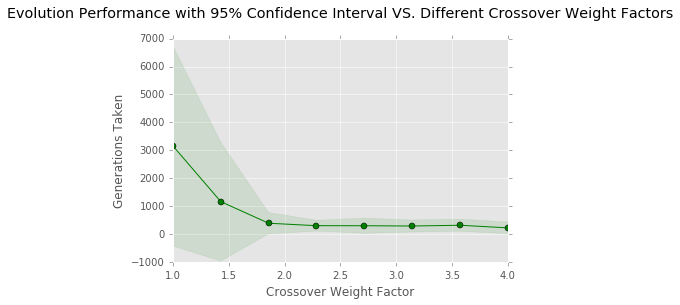

In [575]:
start = time.time()
# this will be a nested list, each sub-list correspondes to a fixed population size,
# consisting of multiple trials, each is the number of generations taken to reach "hello world"
generations_taken = []
pop_size = 20
max_gen = 5000
mutation_rate = 0.02
crossover_point = 'dynamic'
selection_weight_factors = np.linspace(1,4,8)
repeating_factor =10 # repeat this many times for each population size, to get the average and standard deviation

for selection_weight_factor in selection_weight_factors:
    #print 'selection_weight_factor: ',selection_weight_factors
    current_gen_taken = [] 
    for i in range(repeating_factor):
        current_gen_taken.append(evolution_trial(pop_size,max_gen,mutation_rate,crossover_point,selection_weight_factor))
    generations_taken.append(current_gen_taken)

mean_generations_taken = np.array(generations_taken).mean(axis=1)
std_generations_taken = np.array(generations_taken).std(axis=1)

plt.title('Evolution Performance with 95% Confidence Interval VS. Different Selection Weight Factors\n')
plt.xlabel("Selection Weight Factor")
plt.ylabel("Generations Taken")
plt.fill_between(selection_weight_factors, mean_generations_taken - 2*std_generations_taken,
                 mean_generations_taken + 2*std_generations_taken, alpha=0.1,color="g")
plt.plot(selection_weight_factors, mean_generations_taken, 'o-', color="g")

for i in range(len(selection_weight_factors)):
    print 'Crossover Weight Factor: ',selection_weight_factors[i],', 95% CI for Num of Gens Needed: (',mean_generations_taken[i]-2*std_generations_taken[i],',',mean_generations_taken[i]+2*std_generations_taken[i],')'

print 'time spent: ',time.time()-start

#### We can see as we make it more likely to select the best fitted candidates to become parents for next generation, the quicker and more stable it will find optimal solutions. This is especially prominent for smaller population size. 

#  

#### I have also found the more diverse the initial population is, the quicker the alogorithm will converge and reach the best the solution

### performance VS. target complexity

target:  hello , target complexity:  5 , 95% CI for Num of Gens Needed: ( 11.10940176 , 68.89059824 )
target:  hello world , target complexity:  11 , 95% CI for Num of Gens Needed: ( 113.495943548 , 983.170723119 )
target:  hello dear world , target complexity:  16 , 95% CI for Num of Gens Needed: ( 1791.1302234 , 3607.53644326 )
target:  hello my dear world , target complexity:  19 , 95% CI for Num of Gens Needed: ( 723.646901659 , 7042.35309834 )
time spent:  52.0048820972


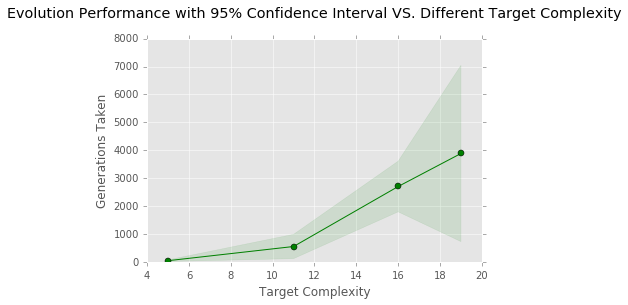

In [597]:
start = time.time()
# this will be a nested list, each sub-list correspondes to a fixed population size,
# consisting of multiple trials, each is the number of generations taken to reach "hello world"
generations_taken = []  
targets = ['hello','hello world','hello dear world','hello my dear world']
population_size = 50
max_gen = 5000
mutation_rate = 0.02
crossover_point = 'dynamic'
selection_weight_factor = 1
repeating_factor =3 # repeat this many times for each population size, to get the average and standard deviation

for target in targets:
    #print 'target: ',target
    current_gen_taken = [] 
    for i in range(repeating_factor):
        current_gen_taken.append(evolution_trial(target,population_size,max_gen,mutation_rate,crossover_point,selection_weight_factor))
    generations_taken.append(current_gen_taken)

mean_generations_taken = np.array(generations_taken).mean(axis=1)
std_generations_taken = np.array(generations_taken).std(axis=1)

plt.title('Evolution Performance with 95% Confidence Interval VS. Different Target Complexity\n')
plt.xlabel("Target Complexity")
plt.ylabel("Generations Taken")
plt.fill_between(map(lambda x:len(x),targets), mean_generations_taken - 2*std_generations_taken,
                 mean_generations_taken + 2*std_generations_taken, alpha=0.1,color="g")
plt.plot(map(lambda x:len(x),targets), mean_generations_taken, 'o-', color="g")

for i in range(len(map(lambda x:len(x),targets))):
    print 'target: ',targets[i],', target complexity: ',map(lambda x:len(x),targets)[i],', 95% CI for Num of Gens Needed: (',mean_generations_taken[i]-2*std_generations_taken[i],',',mean_generations_taken[i]+2*std_generations_taken[i],')'

print 'time spent: ',time.time()-start

#### Looks like the more complex the evolutionary goal is, the more generations it takes to reach an optimal solution